# Youtube Trending Videos Analysis

> This is an extension from [this](https://thecleverprogrammer.com/2020/11/28/youtube-trending-videos-analysis-with-python/) article done by Aman Kharwal

> This analysis uses data from https://www.kaggle.com/datasnaek/youtube-new/download

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [105]:
df = pd.read_csv("data/youtube-trends/USvideos.csv")
df.set_index(keys=["video_id"], inplace=True)
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## EDA - Exploratory Data Analysis

In [106]:
df["description"].fillna(value="", inplace=True)

In [107]:
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [108]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


In [109]:
# How many categories?
df['category_id'].value_counts().count()

16

In [110]:
# How many videos have 0 comments?
df[df['comment_count'] == 0]['comment_count'].count()

760

In [111]:
# Most disliked video?
df[df['dislikes'] == df['dislikes'].max()]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,


In [112]:
# Most likes?
df[df['likes'] == df['likes'].max()]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


In [113]:
# 10 channels with the most views?
df.groupby(by='channel_title')['views'].sum().sort_values(ascending=False)[:10]

channel_title
ChildishGambinoVEVO            3758488765
ibighit                        2235906679
Dude Perfect                   1870085178
Marvel Entertainment           1808998971
ArianaGrandeVevo               1576959172
MalumaVEVO                     1551515831
jypentertainment               1486972132
Sony Pictures Entertainment    1432374398
FoxStarHindi                   1238609854
BeckyGVEVO                     1182971286
Name: views, dtype: int64

Top Channels and Categories:

1. ChildishGambinoVEVO: **Artist/Music**
1. ibighit: **Company/Music**
1. Dude Perfect: **Group/Viral Videos**
1. Marvel Entertainment: **Company/HQs, Movies**
1. ArianaGrandeVevo: **Artist/Music**
1. MalumaVEVO: **Artist/Music**
1. jypentertainment: **Company/Music**
1. Sony Pictures Entertainment: **Company/Movies**
1. FoxStarHindi: **Company/Movies, Bollywood**
1. BeckyGVEVO: **Artist/Music**

In [116]:
# Video with most dislikes that has comments disabled
df[df['comments_disabled']]['dislikes'].sort_values(ascending=False)[:10]

video_id
8I_NkJ8VTEI    59157
8I_NkJ8VTEI    58932
8I_NkJ8VTEI    58726
8I_NkJ8VTEI    58327
8I_NkJ8VTEI    57285
8I_NkJ8VTEI    54061
8I_NkJ8VTEI    46778
J2m7EUwnqGg    31716
J2m7EUwnqGg    31697
J2m7EUwnqGg    31642
Name: dislikes, dtype: int64

### Observations looking only to stats

1. All numerical columns have values
1. 50% of the videos have less views then the mean
1. 75% of the videos have less likes then the mean
1. 75% of the videos have less comments then the mean
1. There are 16 categories of videos
1. 760 videos have 0 (zero) comments
1. The video with most dislikes is from Logan Paul apologizing from the video he did in the s* florest
1. The video with most likes is a music from BTS
1. All top 10 channels are related with music or movies
1. Video with most dislikes that has comments disabled is from Judge Roy Moore campaign statement in 2017

## Data Visualization

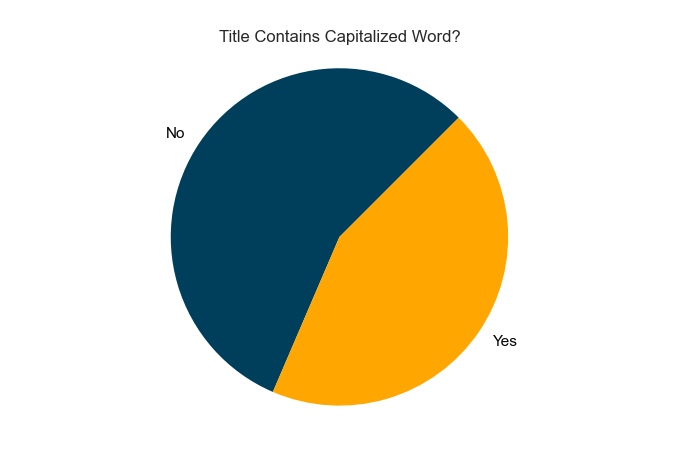

In [120]:
# How much titles contain at least one capitalized word?
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

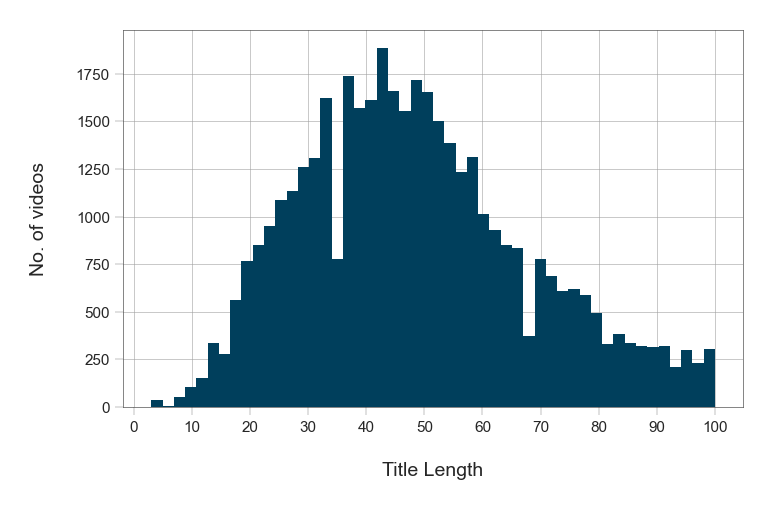

In [121]:
# What is the distribution of the titles length?
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

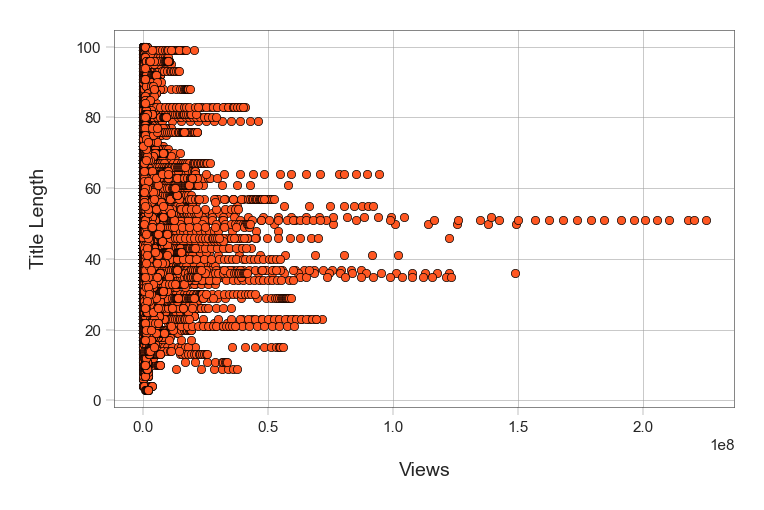

In [122]:
# Relationship between title length and views?
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

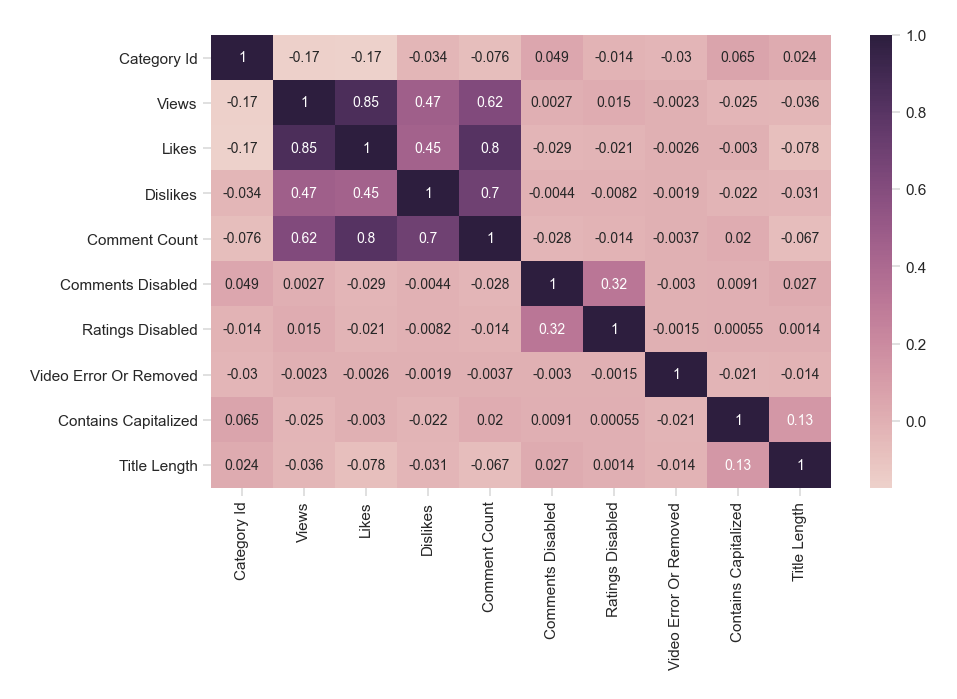

In [123]:
# Building the correlation matrix
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

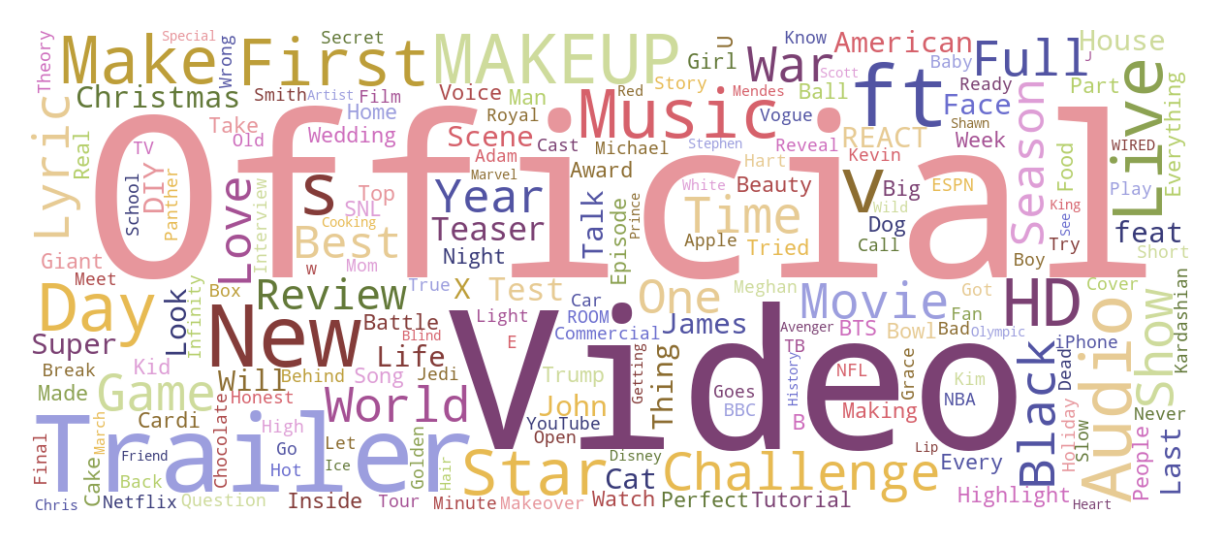

In [124]:
# Wordcloud with title words
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## Conclusion

The trending topics from US Youtube videos shows that people watch and like more music and movies, the word cloud confirms that by showing that "Official", "Trailer", "Video", "Movie" and "Music" are highly used. High number of comments is correlated with views, likes and dislikes, meaning that content creators should always ask for people to comment.